# 1 Hidden layer deep shallow neural network

![Dribbble%20shot%20-%202.svg](https://raw.githubusercontent.com/rishabhdhayal/Deep-Learning/main/images/Dribbble%20shot%20-%202.svg)

##### Steps
- Import Required libraries
- Load the Data set
- Visualize the data
- Preprocess the data

**Model**

- Define the neural network structure
- Initialize the model's parameters
- Forward_propagation
- Compute the Cost
- Implement Backpropagation
- Update Parameters
- Integration of different functions
- Predict
- Find the Performance : Accuracy

# 1 - Package imports

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Dataset generator

**Ignore**

In [55]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 
    N = int(m/2) 
    D = 2 
    X = np.zeros((m,D)) 
    Y = np.zeros((m,1), dtype='uint8') 
    a = 4 

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# 2 - Load the Dataset 

In [2]:
X, Y = load_planar_dataset()

In [13]:
print("X Shape = ",X.shape)
print("Y shape = ",Y.shape)

X Shape =  (2, 400)
Y shape =  (1, 400)


# 3 - Visualize the data:

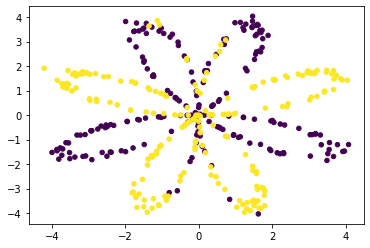

In [12]:
plt.scatter(X[0,:],X[1,:],c=Y, s=20,)

In [15]:
m = X.shape[1]
m

400

# 4 - Model Functions

### 4.1 - Defining the neural network structure ####

####  layer_sizes 

In [17]:
def layer_sizes(X,Y):
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

### 4.2 - Initialize the model's parameters ####

In [19]:
def initialize_parameters(n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parms = {
        "W1":W1, "b1":b1, "W2":W2, "b2":b2
    }
    
    return parms

###  4.3 - forward_propagation


$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$


In [54]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [22]:
def forward_propogate(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
    

### 4.4 - Compute the Cost

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} $$

In [29]:
def compute_cost(A2,Y):
    m = Y.shape[1]
    c = (-1/m) * np.sum( Y * np.log(A2) + (1 - Y)*np.log(1 - A2) )
    
    c = float(np.squeeze(c)) 
    return c

### 4.5 - Implement Backpropagation

![Dribbble%20shot%20-%202.svg](https://raw.githubusercontent.com/rishabhdhayal/Deep-Learning/main/images/grad_summary.png)


$g^{[1]'}(z) = 1-a^2$

In [34]:
def backward_propagation(parameters , cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T*dZ2 * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### 4.6 - Update Parameters 

In [36]:
def update_parameters(parameters , grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 4.7 - Integration

## Neural Network Model

In [38]:
def model(X,Y,n_h, learning_rate, iterations_num):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    for i in range(0,iterations_num):
        
        A2, cache = forward_propogate(X, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
    cost = compute_cost(A2, Y)
    print("cost =",cost)
    
    return parameters

## 5 - Test the Model


### 5.1 - Predict

In [39]:
def predict(parameters , X):
    
    A2, cache = forward_propogate(X,parameters)
    Y_predictions = np.round(A2)
    
    return Y_predictions

### 5.2 - Test the Model on the Planar Dataset

In [41]:
parameters = model(X,Y,4,learning_rate=1.2, iterations_num=10000)

cost = 0.21774551479172977


# Accuracy

In [52]:
predictions = predict(parameters, X)

In [53]:
print ('Accuracy: ', 100 - np.mean(np.abs(predictions - Y)) * 100 ,'%')

Accuracy:  90.5 %
